# Introduction

Preparing a Visualization report on the given HR dataset

Importing libraries like numpy, pandas, spacy, seaborn as important libraries for data analysis & visualization

In [3]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

# Data Preparation

In [4]:
hr_database=pd.read_csv('C:/Users/Perdoruesi/Desktop/Oeson Course/Ass 2/HRDataset_v14.csv',encoding='ISO-8859-1')
hr_database.head()

,ï»¿Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,01-03-2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,02-01-2016,0,2


In [5]:
print(hr_database.info()) #getting all the information needed for the database
print(hr_database.columns)
print(hr_database.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ï»¿Employee_Name            311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

📊 Gender Distribution 

In [6]:
gender_counts = hr_database['Sex'].value_counts()
print(gender_counts)

F     176
M     135
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender Distribution')

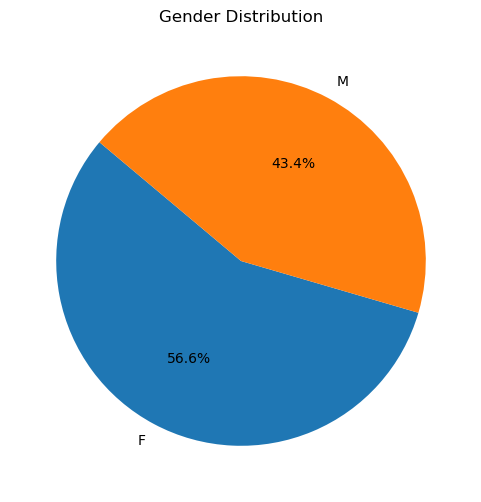

In [7]:
gender_counts = hr_database['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')


# DATA VISUALIZATION

💍 Marital Status Distribution

In [8]:
marital_status_distribution = hr_database['MaritalStatusID'].value_counts()
print(marital_status_distribution)

0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widowed')])

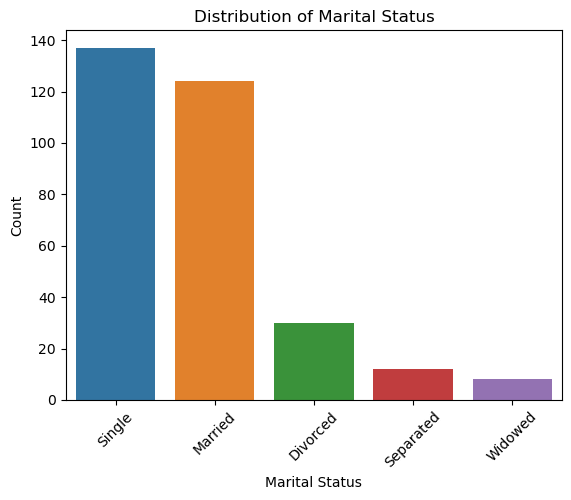

In [9]:
#Distribution of Marital Status

marital_status_counts = hr_database['MaritalDesc'].value_counts()
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Violin Plot: Salary by Marital Status')

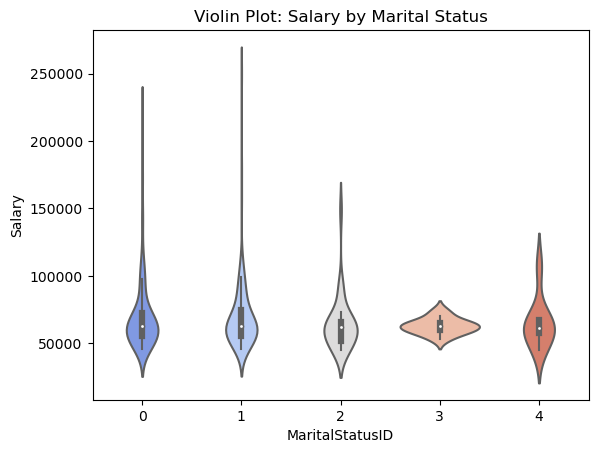

In [10]:
#Salary by Marital status 
sns.violinplot(x=hr_database['MaritalStatusID'], y=hr_database['Salary'], palette='coolwarm')
plt.xlabel('MaritalStatusID')
plt.ylabel('Salary')
plt.title('Violin Plot: Salary by Marital Status')


The violin plot above illustrates the distribution of salaries across different marital statuses. Each 'violin' represents a Marital Status ID, showing the density of the salary distribution at different points. This visualization can help identify if marital status has any apparent effect on salary distribution within the dataset. 
In our case  ANOVA test is approximately 0.558, and the P-value is approximately 0.693. This high P-value suggests that there is no statistically significant effect of marital status on salary distribution within the dataset.

(-1.0999996738922413,
 1.099999984471059,
 -1.0999997368181187,
 1.0999998801114765)

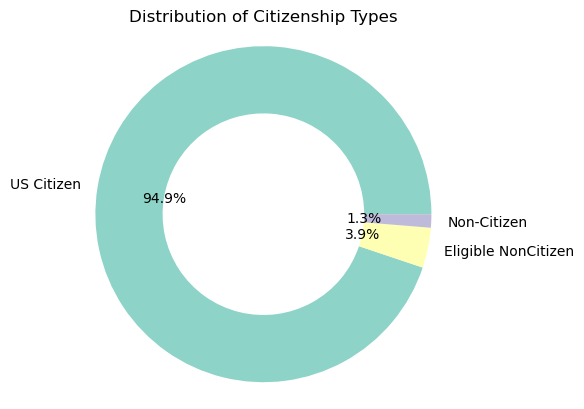

In [11]:
#Distribution by country 

citizenship_counts = hr_database['CitizenDesc'].value_counts()

plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, wedgeprops=dict(width=0.4))
plt.title('Distribution of Citizenship Types')
plt.axis('equal')

This pie chart represents the distribution of different citizenship types within the dataset. Each slice of the pie corresponds to a category of citizenship, with the size of the slice indicating the proportion of the total. As we see 94.9% of the 

📊 Performance Score Distribution

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64


Text(0.5, 1.0, 'Distribution of Performance Scores')

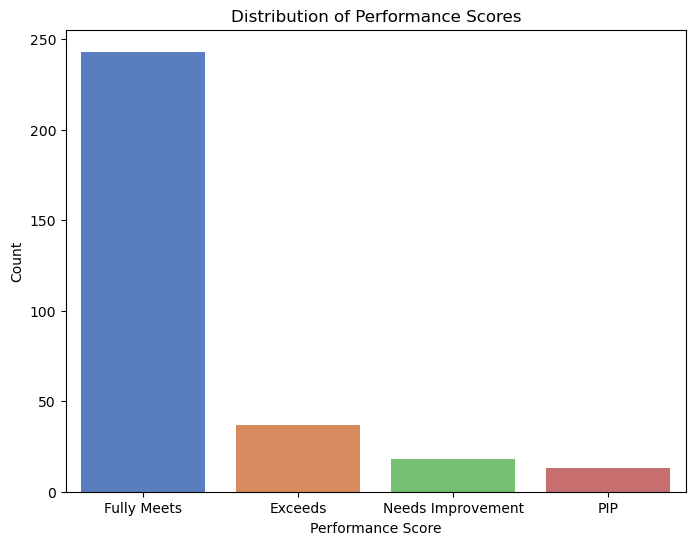

In [12]:
    # Count of performance score
performance_counts = hr_database['PerformanceScore'].value_counts()
print(performance_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='muted')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.title('Distribution of Performance Scores')


From this data, it's clear that the majority of individuals fullymeets theis performace score , followed by a smaller number of employeer that exceeds  and needs improvements

<Axes: xlabel='EmploymentStatus', ylabel='count'>

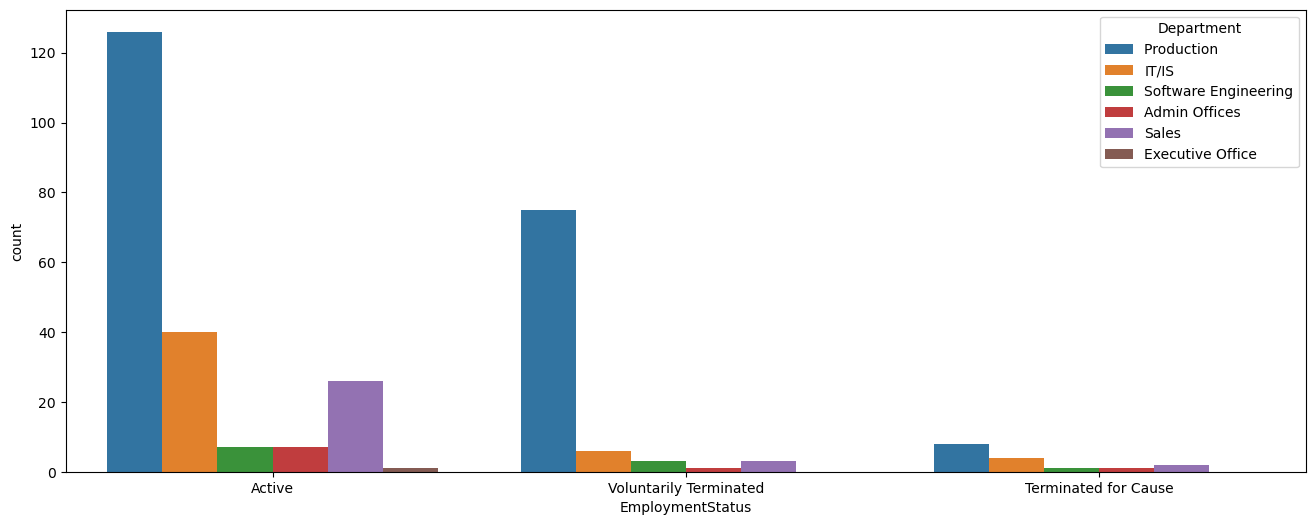

In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(x=hr_database['EmploymentStatus'], hue=hr_database['Department'])

Majority of employeers are part of the Production department with the larges number followed by IT/Is department and Sales.

Text(0.5, 1.0, 'Platform Distribution by Recruitment Source')

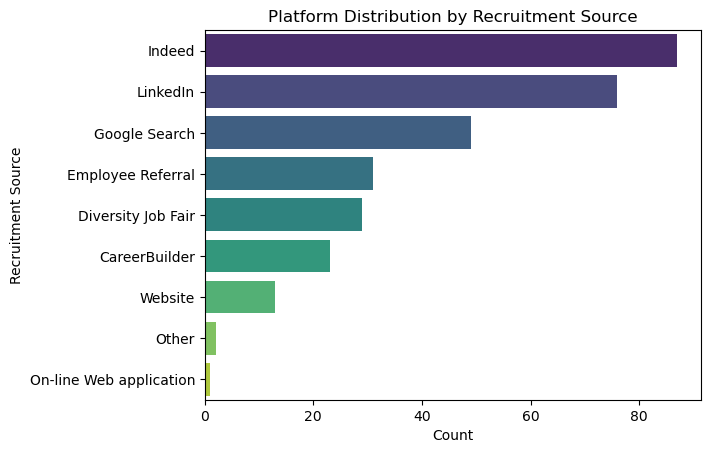

In [14]:
#Platforms distribution 

sns.countplot(y="RecruitmentSource", data=hr_database, order=hr_database['RecruitmentSource'].value_counts().index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Recruitment Source')
plt.title('Platform Distribution by Recruitment Source')


From the chart we can easly tell that  Indeed and Linkedin have the higher distribution by Recruitments Source.

Text(0.5, 1.0, 'Correlation Heatmap: Salary, Engagement, Projects, DaysLate, Absences')

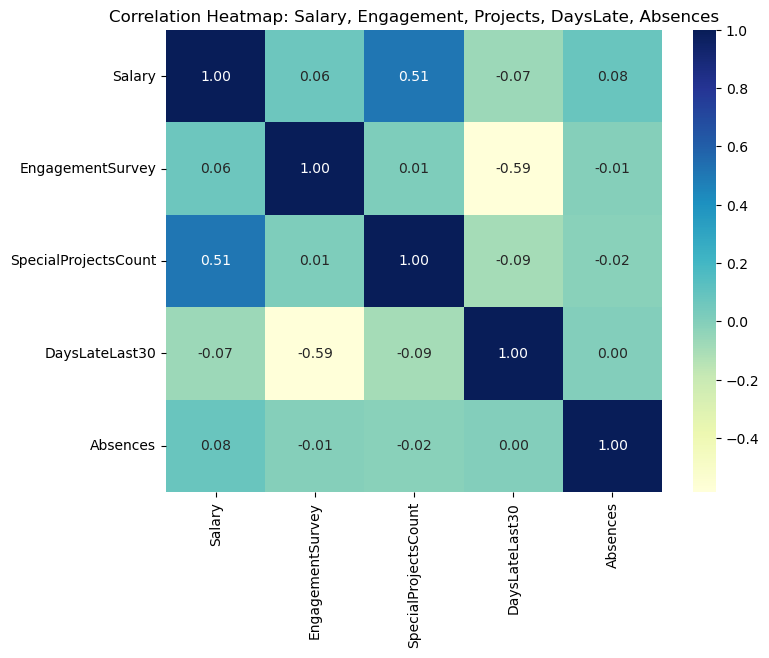

In [15]:
#Correlation Heatmap related with salary engagment project and 
selected_columns = ['Salary', 'EngagementSurvey', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']
selected_data = hr_database[selected_columns]
selected_corr_matrix = selected_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap: Salary, Engagement, Projects, DaysLate, Absences')


This correlation heatmap provides a visual summary of the relationships between different variables in the dataset. in the top-left cell, you can see that the variable 'Salary' is strongly positively correlated with itself, as indicated by the darkest blue color (correlation coefficient of 1.00).
In the bottom-right cell, you can see that the variable 'Absences' is weakly negatively correlated with 'Days LateLast30', as indicated by the lightest blue color (correlation coefficient of -0.02).

💰 Salary Distribution

C:\Users\Perdoruesi\AppData\Local\Temp\ipykernel_13308\4111803247.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salary_range, shade=True, color='skyblue')


Text(0.5, 1.0, 'Salary Distribution ($50,000 to $65,000)')

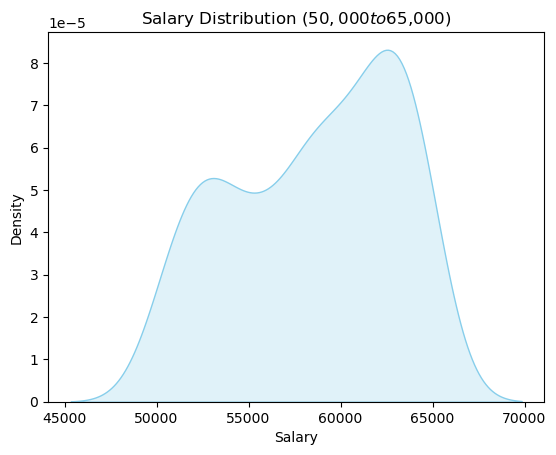

In [103]:
# Filter the dataset for salaries 

salary_range = hr_database[(hr_database['Salary'] >= 50000) & (hr_database['Salary'] <= 65000)]['Salary']
sns.kdeplot(salary_range, shade=True, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution ($50,000 to $65,000)')


KDE plot is used to distribution of salaries for a certain range.The peak of the curve (the highest point on the graph) indicates the most common salary in this range. The wider the curve, the more likely it is that the salary will fall within this range.


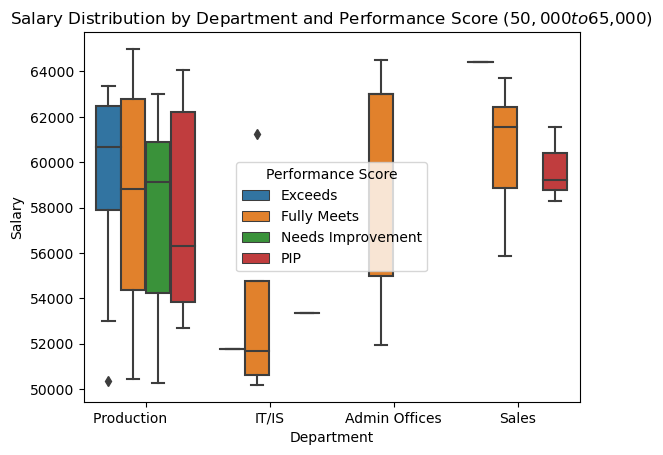

In [102]:
#Dataset for salaries with Box plot 

salary_range = hr_database[(hr_database['Salary'] >= 50000) & (hr_database['Salary'] <= 65000)]
sns.boxplot(x='Department', y='Salary', hue='PerformanceScore', data=salary_range)
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Salary Distribution by Department and Performance Score ($50,000 to $65,000)')
plt.legend(title='Performance Score')


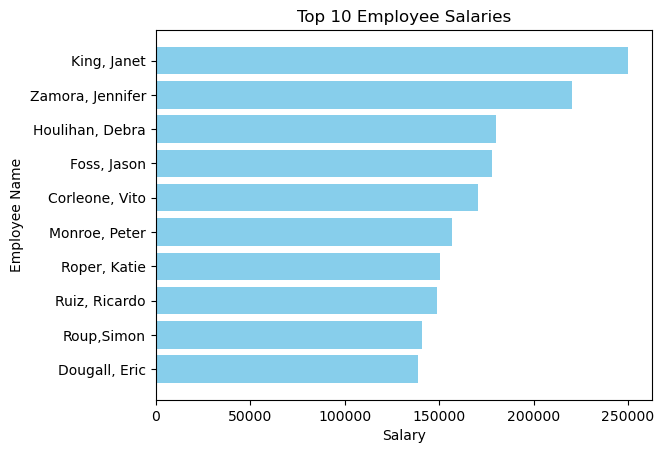

In [101]:
#Top 10 Employee Salaries 
plt.barh(top_10_salaries['ï»¿Employee_Name'], top_10_salaries['Salary'], color='skyblue')
plt.xlabel('Salary')
plt.ylabel('Employee Name')
plt.title('Top 10 Employee Salaries')
plt.gca().invert_yaxis()  


Text(0.5, 1.0, 'Correlation Heatmap: Salary vs EmpSatisfaction')

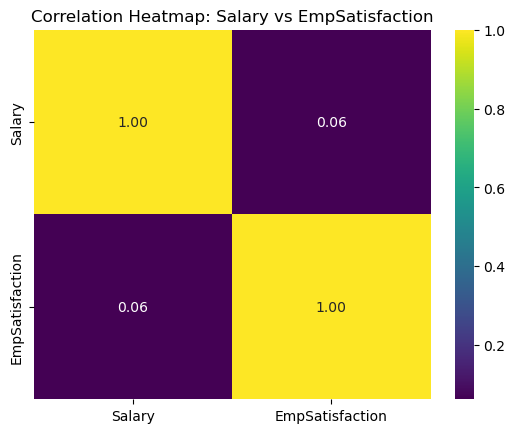

In [100]:
#Correlation between 'Salary' and 'EmpSatisfaction'
selected_columns = ['Salary', 'EmpSatisfaction']
selected_data = hr_database[selected_columns]
selected_corr_matrix = selected_data.corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap: Salary vs EmpSatisfaction')


Termination Status 

(-1.0999980402898488,
 1.0999979650324256,
 -1.0999980003105363,
 1.0999979600720813)

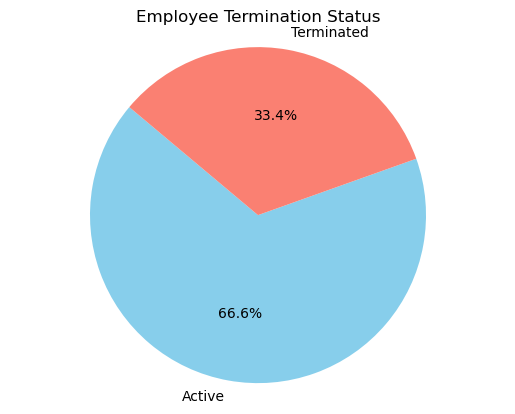

In [99]:
termination_status = hr_database['Termd'].value_counts()
plt.pie(termination_status, labels=['Active', 'Terminated'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Employee Termination Status')
plt.axis('equal')


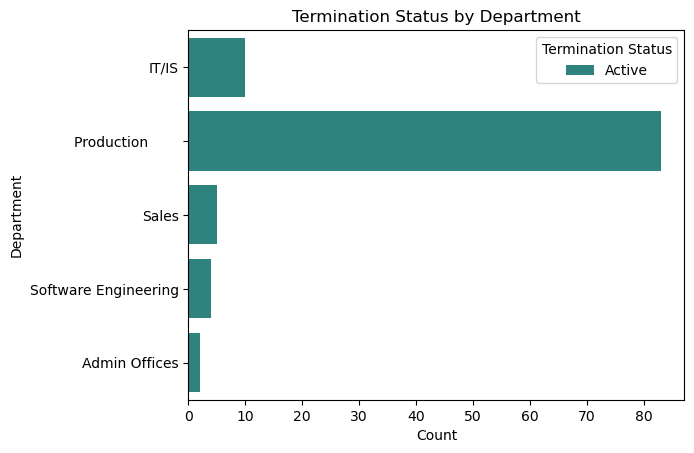

In [98]:
sns.countplot(y='Department', hue='Termd', data=terminated_data, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Department')
plt.title('Termination Status by Department')
plt.legend(title='Termination Status', labels=['Active', 'Terminated'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Another position'),
  Text(1, 0, 'unhappy'),
  Text(2, 0, 'more money'),
  Text(3, 0, 'career change'),
  Text(4, 0, 'hours'),
  Text(5, 0, 'attendance'),
  Text(6, 0, 'return to school'),
  Text(7, 0, 'relocation out of area'),
  Text(8, 0, 'no-call, no-show'),
  Text(9, 0, 'military'),
  Text(10, 0, 'retiring'),
  Text(11, 0, 'performance'),
  Text(12, 0, 'maternity leave - did not return'),
  Text(13, 0, 'medical issues'),
  Text(14, 0, 'Learned that he is a gangster'),
  Text(15, 0, 'Fatal attraction'),
  Text(16, 0, 'gross misconduct')])

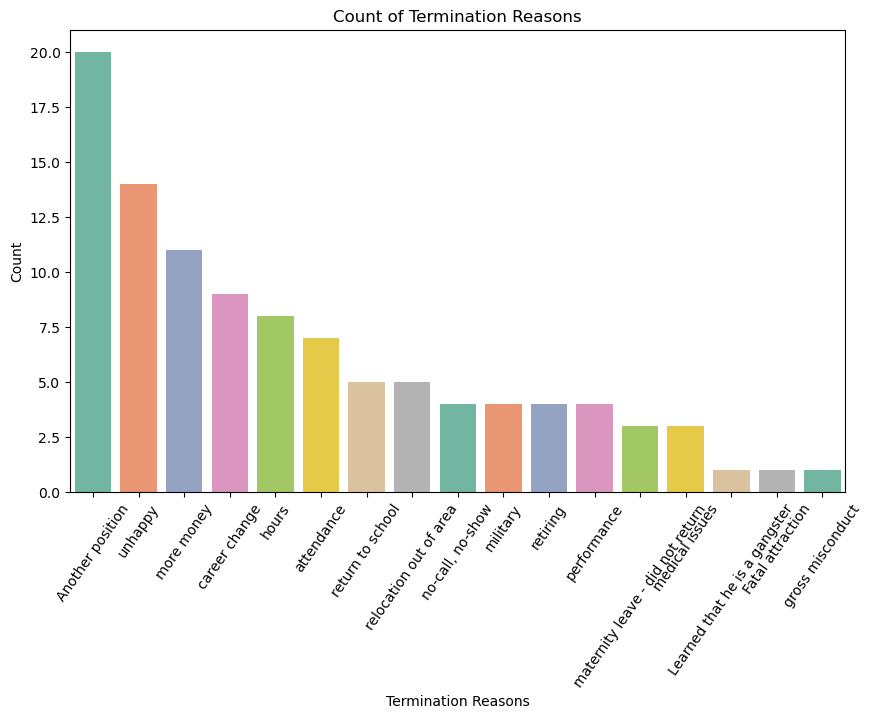

In [132]:
terminated_data = hr_database[hr_database['Termd'] == 1]
plt.figure(figsize=(10, 6))
sns.countplot(x='TermReason', data=terminated_data, order=terminated_data['TermReason'].value_counts().index, palette='Set2')
plt.xlabel('Termination Reasons')
plt.ylabel('Count')
plt.title('Count of Termination Reasons')
plt.xticks(rotation=55)

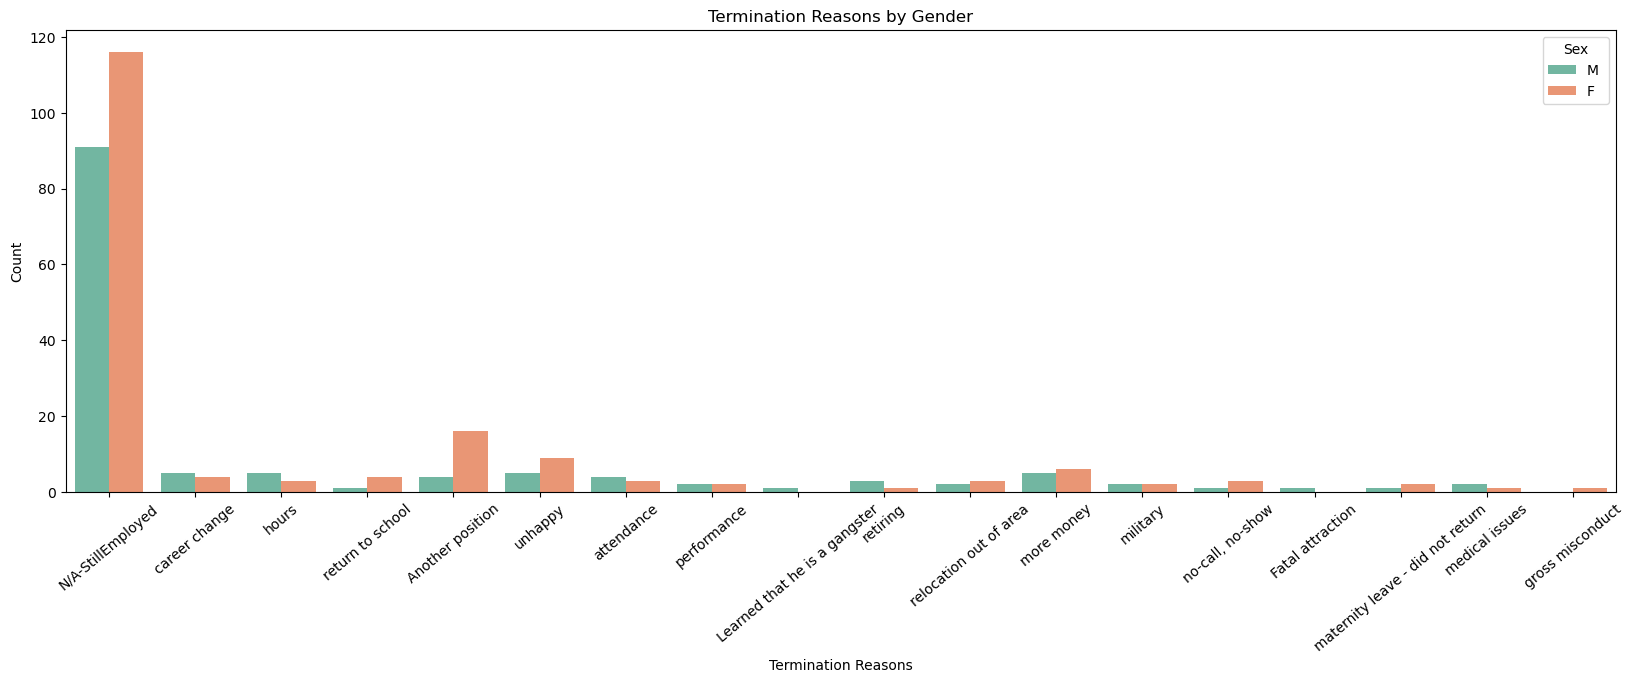

In [137]:
plt.figure(figsize=(20, 6))
sns.countplot(x='TermReason', hue='Sex', data=hr_database, palette='Set2')
plt.title('Termination Reasons by Gender')
plt.xlabel('Termination Reasons')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.xticks(rotation=40)
plt.show()


It is clear that more females were terminated for 'no-call, no-show' reasons, while more males were terminated for 'hours' and 'gross misconduct' reasons. It is also worth noting that a significantly larger number of males were still employed, compared to females, which may suggest a higher rate of turnover for male employees.

Observation to be taken in consider:

    1. Diversity of the company : On the inside we see clearly from the distribution of citizin that US citizian cover is  94.6% of the total employeer so should be consider also another change in company.
    2. The the IT/IS, Production, and Software Engineering departments have higher termination rates than the Sales and Admin so need to taken in consideration
    3. The company's focus on improving its employee's health and well-being has led to a decrease in terminations related to medical issues, while an increase in awareness and concern for potential workplace hazards has led to a higher number of terminations related to dangerous activities.



